# Projet ML

### Les métadonnées

Les données (disponibles sous Kaggle) utilisées dans le cadre de ce TP sont des données
réelles provenant d’une compagnie d’assurance américaine X et sont utiles pour prédire les
primes d’assurance maladie d’un citoyen américain. En effet, de nombreux facteurs
influencent le montant des primes d’assurance maladie fixées par les compagnies d’assurance
et qui sont indépendants de la volonté des assurés. Entre autres facteurs influençant le coût
des primes d'assurance maladie, nous avons :
- L’âge du principal bénéficiaire (age)
- Le sexe de l'assureur (sex)
- L’indice de masse corporelle, permettant de comprendre le corps, les poids
relativement élevés ou faibles par rapport à la taille, indice objectif de poids corporel
(kg/m^2) utilisant le rapport taille/poids, idéalement 18,5 à 24,9 (bmi)
- Le nombre d'enfants couverts par l'assurance maladie ou le nombre de personnes à
charge (children)
- Le statut de l’assuré par rapport au tabagisme, fumeur ou non (smoker)
- La zone résidentielle du bénéficiaire aux États-Unis, nord-est, sud-est, sud-ouest,
nord-ouest (region)
- Les frais médicaux individuels (primes) facturés par l'assurance maladie (charges)
En tant que responsable de la cellule Informatique Décisionnelle et Gestion de Portefeuille,
vous disposez de données mises à disposition par le département IT pour proposer un
système intelligent de prédiction des primes d’assurance de clients désirant souscrire à un
produit d’assurance maladie auprès de la compagnie X.

## Partie 1: Analyse + Modele KNN de base

###  Première description pour présenter les caractéristiques de la dataset

In [1]:
#Importation des biblio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
#Importation et chargement du dataset et affichage des 5 premieres lignes
data = pd.read_excel('C:/Users/Miguel/Downloads/Insurance-data.xlsx')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1000 non-null   int64  
 1   sex       1000 non-null   object 
 2   bmi       1000 non-null   float64
 3   children  1000 non-null   int64  
 4   smoker    1000 non-null   object 
 5   region    1000 non-null   object 
 6   charges   1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


En gros, on vient d'afficher les informations sur le dataset. Pour résumer, on a 1000 lignes et pour chaque variables, 1000 valeurs non nuls. Nous avons aussi quatre (04) variables quantitatives et trois (03) variables qualitatives.

### Analyse descriptive univariée des variables quantitatives

In [4]:
quantitatives = ['age', 'bmi', 'children', 'charges']
data[quantitatives].describe()

,age,bmi,children,charges
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,39.640000,30.865565,1.080000,13099.629425
std,14.169586,6.046396,1.198765,11994.129978
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.600000,0.000000,4719.683425
50%,40.000000,30.590000,1.000000,9286.850750
75%,52.000000,35.112500,2.000000,16073.095438
max,64.000000,50.380000,5.000000,63770.428010


##### Observation
En gros, ici on accès au statistique descriptive des variables quantitatives de notre dataset. En gros nous avons le nombre de ligne non manquante, la moyenne, l'écartype, le minimum, le maximum, le premier et le troisieme quartile et la médiane de chaque variables.

### Une analyse descriptive univariée des variables qualitatives

In [5]:
qualitatives = ['sex', 'smoker', 'region']
data[qualitatives].describe()

,sex,smoker,region
count,1000,1000,1000
unique,2,2,4
top,male,no,southeast
freq,505,803,278


##### Observation
En gros, ici on accès au statistique descriptive des variables qualitatives de notre dataset. En gros nous avons pour chaque variables, le nombre de valeur unique, la valeur la plus fréquente dans le dataset et la fréquence d'apparition de cette valeur là.

### Une analyse descriptive bivariée entre la variable cible et les variables qualitatives avec un boxplot

<AxesSubplot:xlabel='sex', ylabel='charges'>

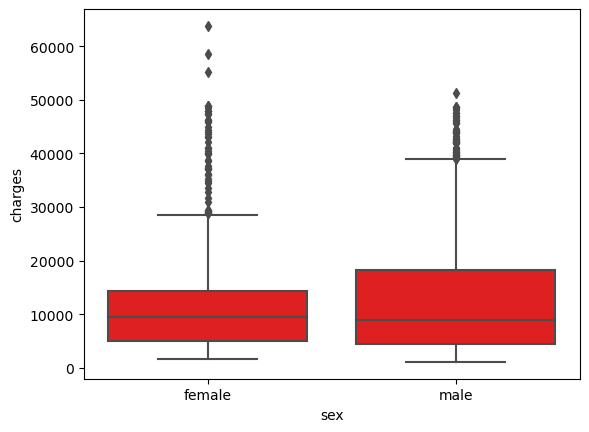

In [6]:
sns.boxplot(x='sex', y='charges', data=data, color='red')

<AxesSubplot:xlabel='smoker', ylabel='charges'>

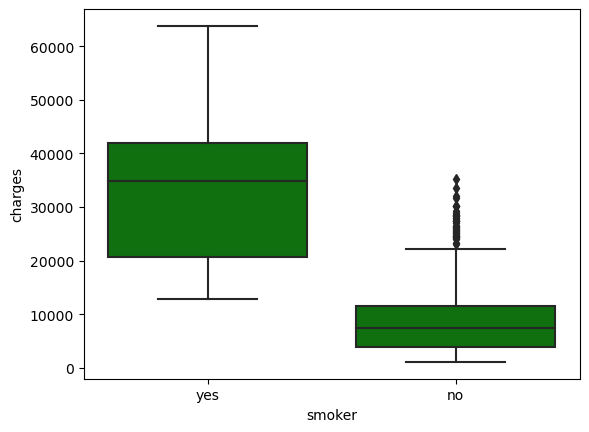

In [7]:
sns.boxplot(x='smoker', y='charges', data=data, color='green')

<AxesSubplot:xlabel='region', ylabel='charges'>

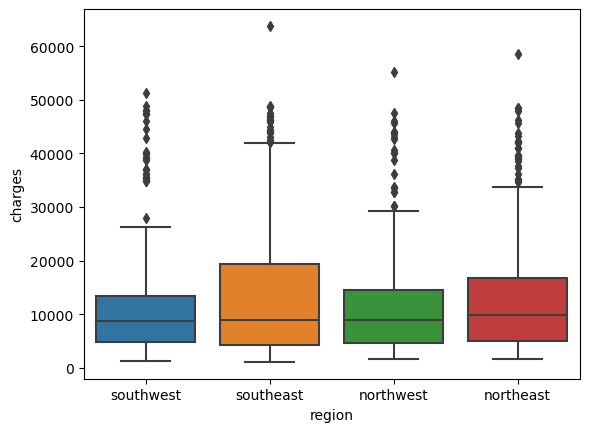

In [8]:
sns.boxplot(x='region', y='charges', data=data)

Ici, on a juste montré la visualisation (avec des boxplot) de la relation entre la variable cible (charges) et les variables qualitatives (sex, region et smoker). On a aussi observé si je peux le dire des outliers.

### Une analyse descriptive bivariée entre la variable cible et les variables quantitatives à l'aide d'un scatterplot

<AxesSubplot:xlabel='age', ylabel='charges'>

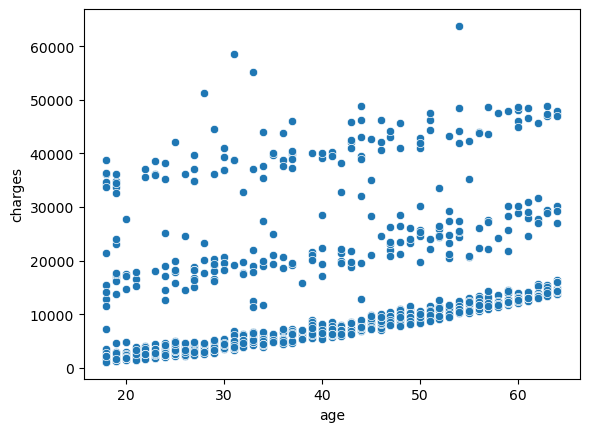

In [9]:
sns.scatterplot(x='age', y='charges', data=data)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

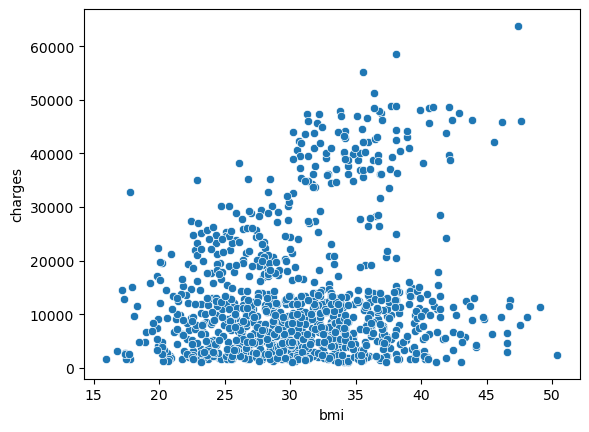

In [10]:
sns.scatterplot(x='bmi', y='charges', data=data)

<AxesSubplot:xlabel='children', ylabel='charges'>

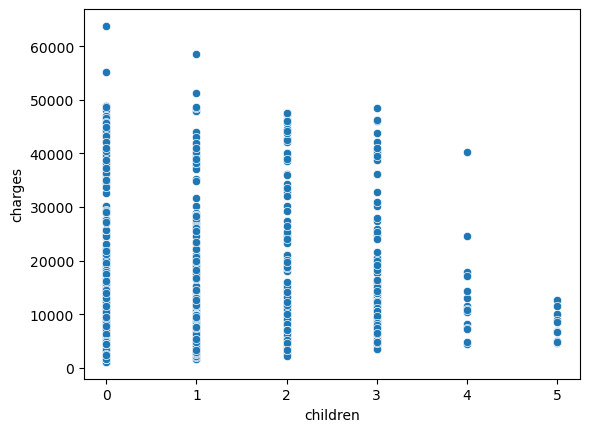

In [11]:
sns.scatterplot(x='children', y='charges', data=data)

Ici, on a juste montré la visualisation (avec des scatterplot) de la relation entre la variable cible (charges) et les variables quantitatives (age, bmi et children).

### Conception d'une matrice de corrélation entre les variables quantitatives de la base de données.

In [12]:
data[quantitatives].corr()

,age,bmi,children,charges
age,1.000000,0.115547,0.029630,0.331909
bmi,0.115547,1.000000,0.025439,0.187547
children,0.029630,0.025439,1.000000,0.050799
charges,0.331909,0.187547,0.050799,1.000000


<AxesSubplot:>

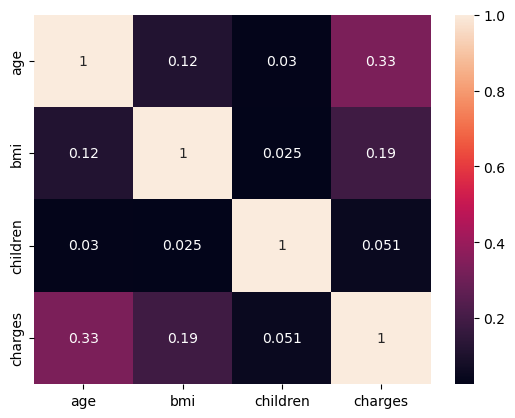

In [13]:
#heatmap de cette matrice de corrélation
sns.heatmap(data[quantitatives].corr(), annot=True)

##### Observation
D'après le resultat obtenu, on peut constater qu'il n'y a pas trop de correlation entre les variables quantitatives. 

### Convertir les variables qualitatives au format approprié pour la modélisation

#### méthode du one-hot encoding

In [14]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse = False)
data_encod = encoder.fit_transform(data[qualitatives])
data_encod = pd.DataFrame(data_encod, columns=encoder.get_feature_names_out(qualitatives))
data_encod.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [15]:
dataset = data[quantitatives]
dataset = dataset.join(data_encod)
dataset.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


#### méthode du maping

In [16]:
df = data
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['region']= df['region'].map({'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3})
df['smoker']= df['smoker'].map({'yes': 1, 'no': 0})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### Division de la base de données en échantillon d’apprentissage (80%) et en échantillon test (20%)

#### Séparation des variables explicatives de la variable cible

In [17]:
from sklearn.model_selection import train_test_split
x = dataset.drop(columns="charges")
y = dataset["charges"]

In [18]:
#Division du dataset avec la méthode train_test_split
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state = 42)

In [19]:
x_train, y_train

(     age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 29    31  36.300         2         0.0       1.0        0.0         1.0   
 535   38  28.025         1         0.0       1.0        1.0         0.0   
 695   26  40.185         0         1.0       0.0        1.0         0.0   
 557   34  34.210         0         0.0       1.0        1.0         0.0   
 836   36  31.500         0         0.0       1.0        1.0         0.0   
 ..   ...     ...       ...         ...       ...        ...         ...   
 106   19  28.400         1         1.0       0.0        1.0         0.0   
 270   18  29.370         1         0.0       1.0        1.0         0.0   
 860   37  47.600         2         1.0       0.0        0.0         1.0   
 435   60  33.110         3         0.0       1.0        1.0         0.0   
 102   18  30.115         0         1.0       0.0        1.0         0.0   
 
      region_northeast  region_northwest  region_southeast  region_southwest  
 29    

In [20]:
#Normalisons d'abord les variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
#la moyenne de la variable test cible
moy = np.mean(y_test)
print ("moyenne : " + str(moy))

moyenne : 14365.539126849997


### Construction d'un premier modèle M0 à partir des paramètres par défaut de l’algorithme

In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#Le modèle M0
M0 = KNeighborsRegressor()
#entrainement sur les données d'apprentissage
M0.fit(x_train, y_train)
#prediction sur les données tests
y_predict = M0.predict(x_test)
#evaluation du modèle
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)
print("rmse : " + str(rmse))
print("r2 : " + str(r2))

y_predict0 = M0.predict(x_train)
mse0 = mean_squared_error(y_train, y_predict0)
rmse0 = np.sqrt(mse0)
r20 = r2_score(y_train, y_predict0)
print("we have also :")
print("rmse : " + str(rmse0))
print("r2 : " + str(r20))
if (r20>r2) and (r20-r2>0.1) :
    print("overfitting")
else :
    print("none")

rmse : 6129.269261758573
r2 : 0.8076401865004499
we have also :
rmse : 4362.081853474398
r2 : 0.8539900596221373
none


### Modifier le paramètre K pour construire trois autres modèles M1, M2 et M3

#### - Pour K= 3

In [23]:
#Le modèle M1
M1 = KNeighborsRegressor(n_neighbors=3)
#entrainement sur les données d'apprentissage
M1.fit(x_train, y_train)
#prediction sur les données tests
y_predict1 = M1.predict(x_test)
#evaluation du modèle
mse1 = mean_squared_error(y_test, y_predict1)
rmse1 = np.sqrt(mse1)
r21 = r2_score(y_test, y_predict1)
print("rmse : " + str(rmse1))
print("r2 : " + str(r21))

y_predict1_1 = M1.predict(x_train)
mse1_1 = mean_squared_error(y_train, y_predict1_1)
rmse1_1 = np.sqrt(mse1_1)
r21_1 = r2_score(y_train, y_predict1_1)
print("we have also :")
print("rmse : " + str(rmse1_1))
print("r2 : " + str(r21_1))
if (r21_1>r21) and (r21_1-r21>0.1) :
    print("overfitting")
else :
    print("none")

rmse : 6046.873782880984
r2 : 0.8127771924647753
we have also :
rmse : 3922.4726831909697
r2 : 0.8819367707977713
none


#### - Pour K=7

In [24]:
#Le modèle M2
M2 = KNeighborsRegressor(n_neighbors=7)
#entrainement sur les données d'apprentissage
M2.fit(x_train, y_train)
#prediction sur les données tests
y_predict2 = M2.predict(x_test)
#evaluation du modèle
mse2 = mean_squared_error(y_test, y_predict2)
rmse2 = np.sqrt(mse2)
r22 = r2_score(y_test, y_predict2)
print("rmse : " + str(rmse2))
print("r2 : " + str(r22))

y_predict2_1 = M2.predict(x_train)
mse2_1 = mean_squared_error(y_train, y_predict2_1)
rmse2_1 = np.sqrt(mse2_1)
r22_1 = r2_score(y_train, y_predict2_1)
print("we have also :")
print("rmse : " + str(rmse2_1))
print("r2 : " + str(r22_1))
if (r22_1>r22) and (r22_1-r22>0.1) :
    print("overfitting")
else :
    print("none")

rmse : 6189.965758770262
r2 : 0.8038115484244645
we have also :
rmse : 4685.666307715148
r2 : 0.831524204453717
none


#### - Pour K=10

In [25]:
#Le modèle M3
M3 = KNeighborsRegressor(n_neighbors=10)
#entrainement sur les données d'apprentissage
M3.fit(x_train, y_train)
#prediction sur les données tests
y_predict3 = M3.predict(x_test)
#evaluation du modèle
mse3 = mean_squared_error(y_test, y_predict3)
rmse3 = np.sqrt(mse3)
r23 = r2_score(y_test, y_predict3)
print("rmse : " + str(rmse3))
print("r2 : " + str(r23))

y_predict3_1 = M3.predict(x_train)
mse3_1 = mean_squared_error(y_train, y_predict3_1)
rmse3_1 = np.sqrt(mse3_1)
r23_1 = r2_score(y_train, y_predict3_1)
print("we have also :")
print("rmse : " + str(rmse3_1))
print("r2 : " + str(r23_1))
if (r23_1>r23) and (r23_1-r23>0.1) :
    print("overfitting")
else :
    print("none")

rmse : 6336.468718584485
r2 : 0.7944149467746737
we have also :
rmse : 5087.545093763395
r2 : 0.8013853197716359
none


### Evaluation des performances de chacun de ces modèles

In [26]:
#Les erreurs pour évaluer les rmse (c'est pour voir un truc)
#er = (rmse/moy)
#er1 = (rmse1/moy)
#er2 = (rmse2/moy)
#er3 = (rmse3/moy)

performances =pd.DataFrame({
    'Modele' : ['M0', 'M1', 'M2', 'M3'], 
    'rmse' : [rmse, rmse1, rmse2, rmse3], 
    'r2score' : [r2, r21, r22, r23],
})
print(performances)

  Modele         rmse   r2score
0     M0  6129.269262  0.807640
1     M1  6046.873783  0.812777
2     M2  6189.965759  0.803812
3     M3  6336.468719  0.794415


In [27]:
from sklearn.model_selection import GridSearchCV
#Definition des hyperparamètres à tester
param_grid = {
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto']
}
#Recherche des meilleurs hyperparamètres avec GridSearchCV
gridsearch = GridSearchCV(M3, param_grid, cv=5, scoring = 'r2')
gridsearch.fit(x_train, y_train)
#le meilleur parametre 
best_parametre = gridsearch.best_params_
print(best_parametre)

{'algorithm': 'ball_tree', 'p': 2, 'weights': 'distance'}


In [28]:
best_parametre = KNeighborsRegressor(n_neighbors=10, weights='distance', algorithm='ball_tree', p=2)
#Entrainement du modele avec le meilleur parametre
best_parametre.fit(x_train, y_train)
#Evaluation de ce modèle
y_best_predict = best_parametre.predict(x_test)
#Donc
mse_best = mean_squared_error(y_test, y_best_predict)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_best_predict)
print("rmse : " + str(rmse_best))
print("r2_best : " + str(r2_best))

y_best_predict_2=best_parametre.predict(x_train)
mse_best_2=mean_squared_error(y_train, y_best_predict_2)
rmse_best_2=np.sqrt(mse_best_2)
r2_best_2=r2_score(y_train, y_best_predict_2)
print("With have also :")
print("rmse : " + str(rmse_best_2))
print("r2_best : " + str(r2_best_2))
if (r2_best_2>r2_best) and (r2_best_2-r2_best>0.1) :
    print("overfitting")
else :
    print("none")

rmse : 6055.239543824586
r2_best : 0.8122587941131612
With have also :
rmse : 571.5508761137357
r2_best : 0.9974932871246528
overfitting


##### Comparaison au modele par défaut genre M0

In [29]:
perform = pd.DataFrame({
    'Modele' : ['M0', 'Mbest'], 
    'rmse' : [rmse, rmse_best], 
    'r2score' : [r2, r2_best],
})
print(perform)
#

  Modele         rmse   r2score
0     M0  6129.269262  0.807640
1  Mbest  6055.239544  0.812259


### Représentation d'un nuage de points qui nous permettra de visualiser la relation entre les valeurs réelles et les valeurs prédites

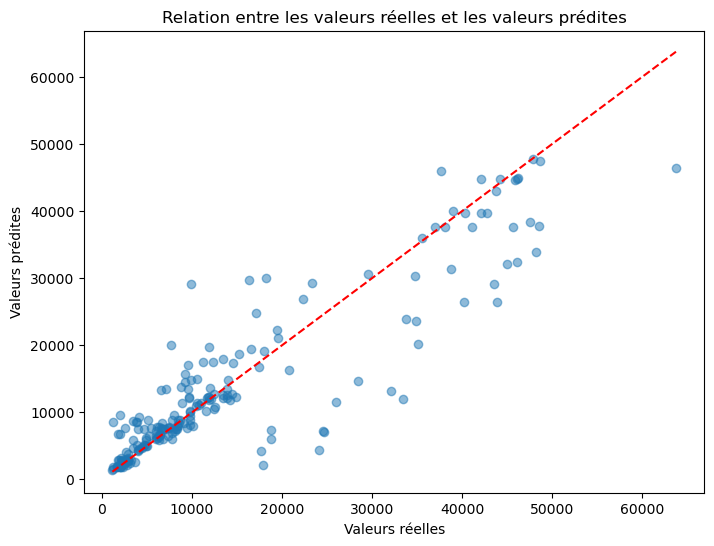

In [30]:
# Créer un DataFrame avec les valeurs réelles et prédites
results = pd.DataFrame({'Valeurs réelles': y_test, 'Valeurs prédites': y_predict1})

# Tracer le nuage de points
plt.figure(figsize=(8, 6))
plt.scatter(results['Valeurs réelles'], results['Valeurs prédites'], alpha=0.5)
plt.plot([results['Valeurs réelles'].min(), results['Valeurs réelles'].max()],
         [results['Valeurs réelles'].min(), results['Valeurs réelles'].max()],
         color='red', linestyle='--')

# Ajouter les labels et le titre
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Relation entre les valeurs réelles et les valeurs prédites')
plt.show()

###  Une analyse des résidus issus du meilleur modèle: nuage de points entre les valeurs prédites et les résidus issus du modèle

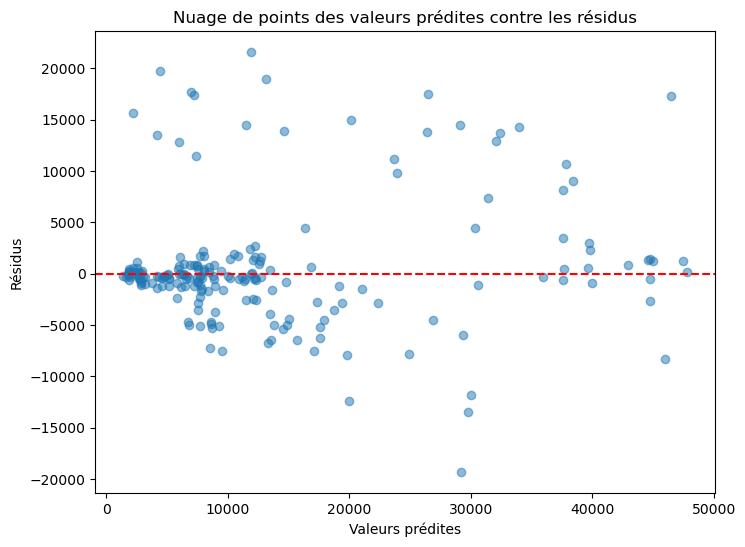

In [31]:
# Calculer les résidus
residuals = y_test - y_predict1

# Créer un DataFrame avec les valeurs prédites et les résidus
results = pd.DataFrame({'Valeurs prédites': y_predict1, 'Résidus': residuals})

# Tracer le nuage de points des valeurs prédites contre les résidus
plt.figure(figsize=(8, 6))
plt.scatter(results['Valeurs prédites'], results['Résidus'], alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')

# Ajouter les labels et le titre
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.title('Nuage de points des valeurs prédites contre les résidus')
plt.show()

### Utilisation du modèle optimal pour prédire sur la nouvelle vague de clients voulant souscrit à une assurance maladie dans la compagnie X (feuille PREDICT)

In [32]:
sheet = pd.read_excel('C:/Users/Miguel/Downloads/Insurance-data.xlsx', sheet_name = 1)
sheet.head()

,age,sex,bmi,children,smoker,region,a
0,36,female,26.885,0,no,northwest,NaN
1,30,male,22.990,2,yes,northwest,NaN
2,24,male,32.700,0,yes,southwest,NaN
3,24,male,25.800,0,no,southwest,NaN
4,48,male,29.600,0,no,southwest,NaN


In [33]:
liste = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
sheet = sheet[liste]
sheet.head()

,age,sex,bmi,children,smoker,region
0,36,female,26.885,0,no,northwest
1,30,male,22.990,2,yes,northwest
2,24,male,32.700,0,yes,southwest
3,24,male,25.800,0,no,southwest
4,48,male,29.600,0,no,southwest


In [34]:
sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       338 non-null    int64  
 1   sex       338 non-null    object 
 2   bmi       338 non-null    float64
 3   children  338 non-null    int64  
 4   smoker    338 non-null    object 
 5   region    338 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 16.0+ KB


In [35]:
quantitative = ['age', 'bmi', 'children']
sheet[quantitative].describe()

,age,bmi,children
count,338.000000,338.000000,338.000000
mean,37.926036,30.065266,1.139053
std,13.630037,6.219539,1.225913
min,18.000000,16.815000,0.000000
25%,25.000000,25.741250,0.000000
50%,38.000000,29.925000,1.000000
75%,49.750000,33.752500,2.000000
max,64.000000,53.130000,5.000000


In [36]:
sheet[qualitatives].describe()

,sex,smoker,region
count,338,338,338
unique,2,2,4
top,male,no,northwest
freq,171,261,94


In [37]:
#Passons à l'encodage des valeurs qualitatives
sheet_encod = encoder.fit_transform(sheet[qualitatives])
sheet_encod = pd.DataFrame(sheet_encod, columns=encoder.get_feature_names_out(qualitatives))
sheet_encod.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [38]:
sheet = sheet[quantitative].join(sheet_encod)
sheet.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,36,26.885,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,30,22.990,2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,24,32.700,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,24,25.800,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,48,29.600,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [39]:
#Normalisons
x_sheet = scaler.fit_transform(sheet)

In [40]:
y_sheet_predict = M1.predict(x_sheet)
sheet['charges'] = y_sheet_predict
sheet.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,36,26.885,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5986.006433
1,30,22.990,2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,20618.058933
2,24,32.700,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,35938.260333
3,24,25.800,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2032.104333
4,48,29.600,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,9682.040000


## Partie 2 : Autres modèles d’apprentissage supervisé

In [41]:
#Les modeles choisis sont le Lineair Regression, le Random Forest Regression et le SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
#Initialisation de ces modeles
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor()
svr_model = SVR()
#Parametre grids pour le randomforestregressor
param_grid1 = {
    'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10]
}
#Parametre grids pour le SVR
param_grid2 = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1],
    'gamma': ['scale', 'auto']
}
#Recherche des meilleurs hyperparamètres avec GridSearchCV
##Pour le randomforest
gridsearch_rf = GridSearchCV(random_forest_model, param_grid1, cv=5)
gridsearch_rf.fit(x_train, y_train)
#le meilleur parametre 
best_parametre_rf = gridsearch_rf.best_params_
print(best_parametre_rf)
##Pour le SVR
gridsearch_svr = GridSearchCV(svr_model, param_grid2, cv=5)
gridsearch_svr.fit(x_train, y_train)
#le meilleur parametre 
best_parametre_svr = gridsearch_svr.best_params_
print(best_parametre_svr)

{'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
{'C': 100, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}


In [42]:
best_parametre_rf = RandomForestRegressor(
    n_estimators=50,
    min_samples_split=10,
    max_depth=5
)
best_parametre_svr = SVR(
    C=100,
    epsilon=0.01,
    gamma='scale',
    kernel='linear'
)
#Entrainement des modeles
linear_model.fit(x_train, y_train)
best_parametre_rf.fit(x_train, y_train)
best_parametre_svr.fit(x_train, y_train)
#Evaluation de ces modeles là
##lineairregression
y_pre1 = linear_model.predict(x_test)
mse_1 = mean_squared_error(y_test, y_pre1)
rmse_1 = np.sqrt(mse_1)
r2_1 = r2_score(y_test, y_pre1)
##randomforest
y_pre2 = best_parametre_rf.predict(x_test)
mse_2 = mean_squared_error(y_test, y_pre2)
rmse_2 = np.sqrt(mse_2)
r2_2 = r2_score(y_test, y_pre2)
##svr
y_pre3 = best_parametre_svr.predict(x_test)
mse_3 = mean_squared_error(y_test, y_pre3)
rmse_3 = np.sqrt(mse_3)
r2_3 = r2_score(y_test, y_pre3)

In [43]:
#Création d'un dataframe pour avoir une bonne vue sur les erreurs calculés de chaque modele
predict_modele = pd.DataFrame({
    "Modele": ['lineairRegression', 'RandomForest', 'SVR'],
    "RMSE" : [rmse_1, rmse_2, rmse_3],
    "R2_Score" : [r2_1, r2_2, r2_3]
})
print(predict_modele)

              Modele         RMSE  R2_Score
0  lineairRegression  6158.822080  0.805781
1       RandomForest  4590.479701  0.892102
2                SVR  8607.090809  0.620677


In [44]:
import joblib
joblib_file = "M1.joblib"
joblib.dump(M1, joblib_file)

['M1.joblib']